In [1]:
import routingpy
import geopandas as gpd
from shapely.geometry import Polygon
client = routingpy.routers.Valhalla(base_url='http://localhost:8002')

/home/titouan/projects/dgfip/.venv/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
bretagne = gpd.read_file('https://github.com/gregoiredavid/france-geojson/raw/master/regions/bretagne/arrondissements-bretagne.geojson')

In [3]:
import pandas as pd
structures = pd.read_csv('https://data.economie.gouv.fr/explore/dataset/coordonnees-des-structures-dgfip/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B',sep=";")

In [4]:
structures = structures[structures['TYPE DE SERVICE'] == 'Centre de Finances publiques']

In [5]:
structures =  structures[structures['DEPARTEMENT'].isin({'29','35','56'})]

In [6]:
isochrones = []
for location in  structures.geocodage.str.split(','):
    if not isinstance(location, float):
        iso = client.isochrones(locations=[float(location[1]), float(location[0])], profile='auto', intervals=[60*15])
        iso_df = gpd.GeoDataFrame(
                                {"id": [x for x in range(len(iso))]},
                                geometry=[Polygon(X.geometry) for X in reversed(iso)], crs="EPSG:4326",
                                    )
        isochrones.append(iso_df)

In [7]:
isos = gpd.GeoDataFrame(pd.concat(isochrones, ignore_index=True), crs=4326)

In [8]:
finistere = bretagne[bretagne.code.str.slice(0,2)=='29']


<AxesSubplot:>

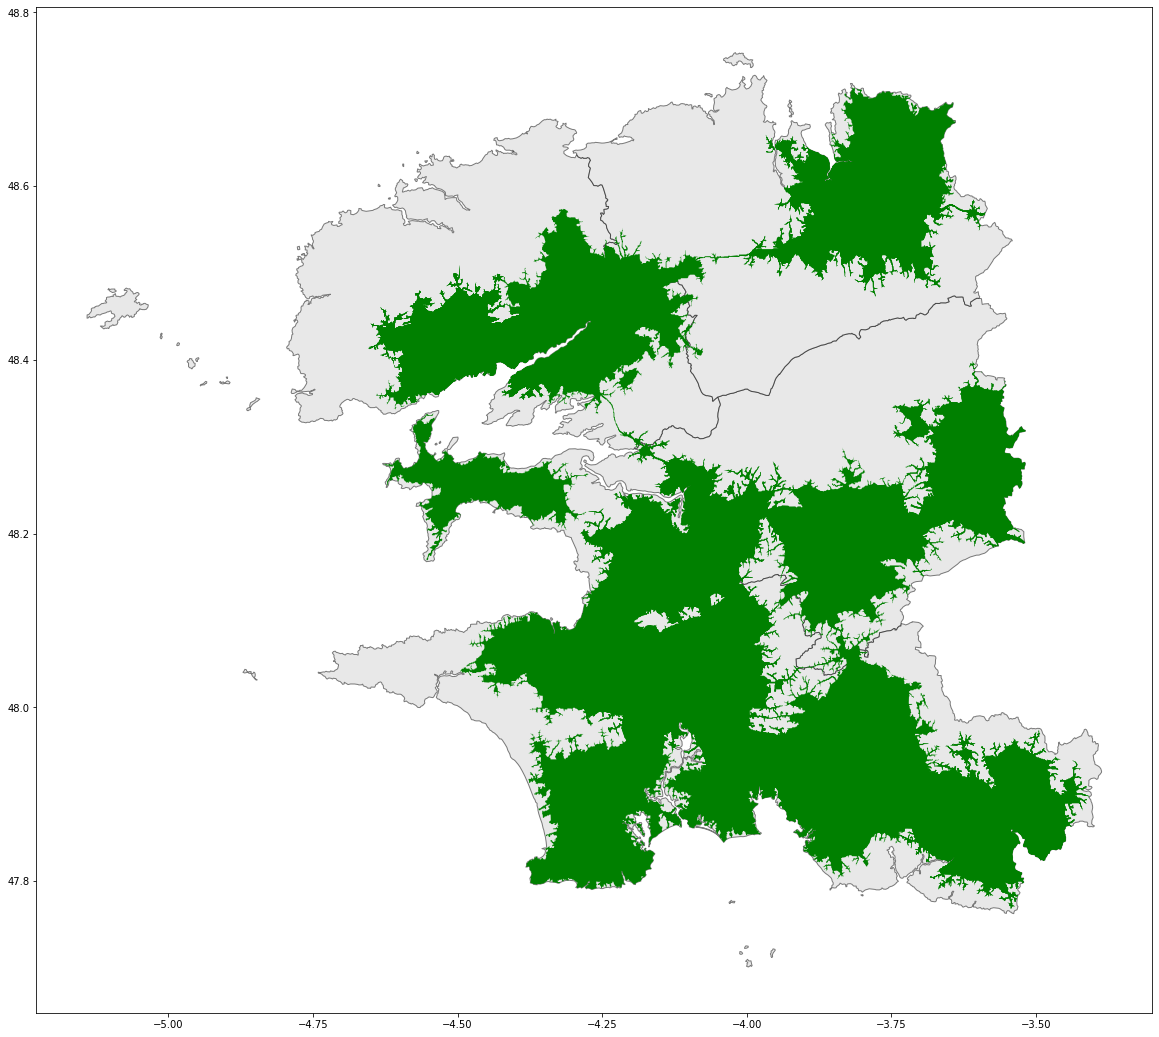

In [11]:
ax = finistere.plot(alpha = 0.5,edgecolor='black', facecolor='lightgrey', figsize = (20,20))
isos.clip(finistere).plot(ax=ax, color='green', legend=True)

In [10]:
bretagne

,code,nom,geometry
0,22001,Dinan,"MULTIPOLYGON (((-2.40968 48.63691, -2.41090 48..."
1,22002,Guingamp,"MULTIPOLYGON (((-2.95101 48.77991, -2.94676 48..."
2,22003,Lannion,"MULTIPOLYGON (((-3.43867 48.89775, -3.43924 48..."
3,22004,Saint-Brieuc,"MULTIPOLYGON (((-3.01954 48.83448, -3.02119 48..."
4,29001,Brest,"MULTIPOLYGON (((-4.86234 48.34130, -4.86448 48..."
5,29002,Châteaulin,"MULTIPOLYGON (((-4.53754 48.30184, -4.53894 48..."
6,29003,Morlaix,"MULTIPOLYGON (((-3.99181 48.73640, -3.99391 48..."
7,29004,Quimper,"MULTIPOLYGON (((-4.00040 47.72283, -4.00391 47..."
8,35001,Fougères-Vitré,"POLYGON ((-1.61010 48.35164, -1.61080 48.35232..."
9,35002,Redon,"POLYGON ((-2.10467 47.95197, -2.10424 47.95339..."
